<a href="https://colab.research.google.com/github/Kashaf-Zia06/Python-AI-Bootcamp/blob/main/Regression_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv("HousePriceDataset.csv")

In [ ]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Garage,LocationScore,Price
0,1660,1,2,2,2010,1,3,369758.2
1,4572,5,3,2,1951,1,7,1011357.8
2,3892,4,1,1,1982,0,4,842272.3
3,1266,1,2,2,2021,0,10,288673.3
4,4244,4,3,2,2011,0,7,852445.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           5000 non-null   int64  
 1   Bedrooms       5000 non-null   int64  
 2   Bathrooms      5000 non-null   int64  
 3   Floors         5000 non-null   int64  
 4   YearBuilt      5000 non-null   int64  
 5   Garage         5000 non-null   int64  
 6   LocationScore  5000 non-null   int64  
 7   Price          5000 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [ ]:
df.shape

(5000, 8)

In [ ]:
# Check for missing values
print(df.isnull().sum())

Area             0
Bedrooms         0
Bathrooms        0
Floors           0
YearBuilt        0
Garage           0
LocationScore    0
Price            0
dtype: int64


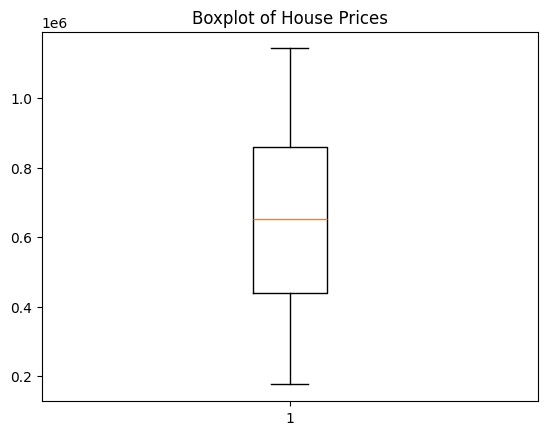

In [ ]:
# Outlier detection (optional)
plt.boxplot(df["Price"])
plt.title("Boxplot of House Prices")
plt.show()

In [ ]:
# Feature-target split
#x = X = df[["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt", "Garage", "LocationScore"]]
X = df.drop("Price", axis=1)
y = df["Price"]
#print(X.head())
print(y.head())

0     369758.2
1    1011357.8
2     842272.3
3     288673.3
4     852445.4
Name: Price, dtype: float64


In [ ]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.05599473e+00 -1.39443839e+00  2.46594323e-04 ...  1.08799489e+00
   9.99200320e-01 -8.98845081e-01]
 [ 1.35797923e+00  1.41721276e+00  1.23321821e+00 ... -1.65723448e+00
   9.99200320e-01  4.94821220e-01]
 [ 7.94276516e-01  7.14299976e-01 -1.23272502e+00 ... -2.14825830e-01
  -1.00080032e+00 -5.50428506e-01]
 ...
 [-9.12582130e-01  7.14299976e-01 -1.23272502e+00 ... -2.87085851e-02
  -1.00080032e+00 -8.98845081e-01]
 [ 2.87773052e-01 -1.39443839e+00  1.23321821e+00 ...  8.55348331e-01
   9.99200320e-01 -1.24726166e+00]
 [-1.66612002e+00  1.41721276e+00  1.23321821e+00 ... -1.00582412e+00
   9.99200320e-01 -5.50428506e-01]]


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction
y_pred = model.predict(X_test)
#y_pred = model.predict([[45690, 7, 2, 1, 2010, 1, 7]])
print(y_pred)

[ 636294.41828347  573944.6103285   707844.02296641  359656.36527797
  256200.59944115  894446.94727123 1043546.71292992  756441.65706178
  737149.85181612  766959.07345186  271909.38672931  897314.44095897
  404667.29199497  374127.10760351  896601.55020856  546073.17580911
  357216.96557332  565203.08285918 1030166.34685919  573317.06631815
  947642.64247972 1000295.51123341  661488.7168238   629528.44464502
  577883.00813622  506940.94663751  758696.63343734  909000.1712229
  591178.64024027 1039522.21537745  866206.88401431  792649.33258108
  848996.52026972  878758.1499396   819680.02358404  590834.58240966
  642586.77071339  635866.10525743  462352.83280385  987283.09743426
  730113.37398574  538176.4295247   860554.22225199  290598.51350175
 1043340.89358313  536045.11731154  291424.10509754  818247.09908874
  641946.34769963  969826.78617245  400580.03596881  394973.41789564
  548945.18088019  787269.63735358  562463.47230591  909705.00886978
  614744.10177711  618466.2318511  

In [ ]:
# Evaluation
print("\n📊 Evaluation Metrics:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


📊 Evaluation Metrics:
MSE: 588697300.0750787
R^2 Score: 0.9899136800135677
MAE: 19468.419832300337
RMSE: 24263.08513101907


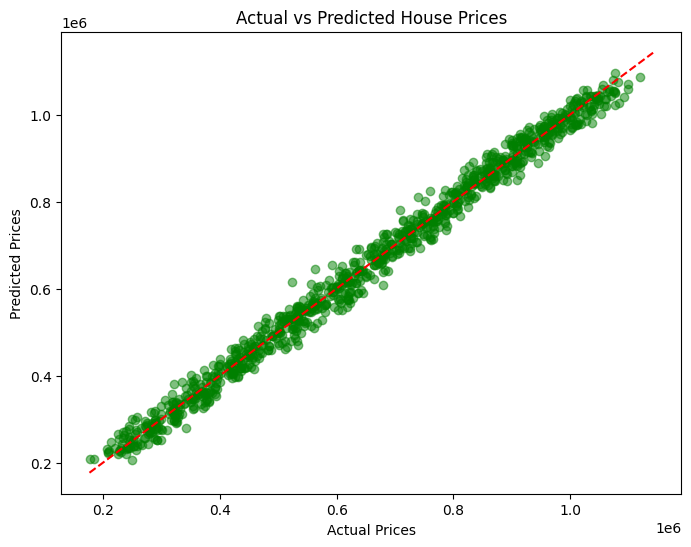

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha = 0.5,  color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()